<h1>Obtenção de Bordas em Imagens utilizando Transformada Wavelet</h1>
<h3>
    <em>Neste projeto aprenderemos o que é a Transformada Wavelet é como ela pode ser utilizada para obtenção de bordas em imgens em tons de cinza.</em>
</h3>
<br>
<div style="border:1px solid #e5e5e5;clear:both;"></div>
<div>
    <div style="text-align:left;float:left;vertical-align:top;width:50%">
            <h3>Pré-requisitos</h3>
            <ul>
                <li>Python e OpenCV</li>
                <li>Processamento de Imagens</li>
                <li>Transformada Wavalet</li>
            </ul>
            <h3>Bibliotecas necessárias</h3>
            <ul>
                <li>Numpy, Matplotlib</li>
                <li>OpenCV (pip install opencv-python)</li>
                <li>PyWavelets (pip install PyWavelets)</li>
            </ul>
    </div>
    <div style="text-align:center">
        <p style="color:#333;text-align:center">Exemplo de uma imagem no domínio Wavelet. <br>Fonte: Wikipedia</p> 
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Jpeg2000_2-level_wavelet_transform-lichtenstein.png/300px-Jpeg2000_2-level_wavelet_transform-lichtenstein.png"><br>
    </div>
</div>
<div style="border:1px solid #e5e5e5;clear:both;"></div>
<h3>Referências</h3>
<ul>
    <li>Daubechies, Ingrid. Ten Lectures on Wavelets. Philadelphia: SIAM, 1992.</li>
    <li>MALLAT, Stéphane. A Wavelet Tour of Signal Processing: The Sparse Way. 3 ed. New York: Elsevier, 2009.</li>
    <li>NIEVERGELT, Yves. Wavelets Made Easy. New York: Springer + Business Media, LLC, 1999.</li>
    <li>Donoho, DL; Johnstone, IM. Threshold selection for wavelet shrinkage of noisy data. Proceedings of 16th Annual International Conference of the IEEE Engineering in Medicine and Biology Society, Baltimore, MD, USA, (1):A24-A25. 1994.</li>
    <li>WEEKS, Michael. Processamento Digital de Sinais utilizando Matlab e Wavelets. Rio de Janeiro: LTC, 2012.</li>
    <li>DUARTE, Marco Aparecido Queiroz. Redução de ruído em sinais de voz no domínio wavelet. 2005. xvii, 105 f. Tese (doutorado) - Universidade Estadual Paulista, Faculdade de Engenharia de Ilha Solteira, 2005. Disponível em: http://hdl.handle.net/11449/100369</li>
    <li>OLIVEIRA, Hélio Magalhães. Análise de Sinais para Engenheiros. Rio de Janeiro: Brasport, 2007.</li>
    <li>Oliveira, BR; Duarte, MAQ; Abreu, CCE; Vieira Filho, J. A wavelet-based method for power-line interference removal in ECG signals. Research on Biomedical Engineering 34 (1), 73-86. 2018.</li>
    <li>Gossler, FE; Oliveira, BR, Duarte, MAQ; Lamblém, RL; Alvarado, FV. A Wavelet Generated from Fibonacci-Coefficient Polynomials and Its Aapplication in Cardiac Arrhythmia Classification. Proceedings of XIX ENMC - National Meeting on Computational Modeling and VII ECTM - Meeting on Materials Science and Technology. 2016.</li>
    
</ul>
<br>
<div style="border:1px solid #e5e5e5;clear:both;"></div>
<br>
<h2>Porque detectar bordas em imagens?</h2>
<br>
<div>
    <div style="text-align:left;float:left;vertical-align:top;width:50%">
            <ul>
                <li>Delineamento de superfícies (principalmente na Medicina)</li>
                <li>Para extração de atributos/características</li>
                <li>Detecção e Reconhecimento de Objetos</li>
            </ul>
    </div>
    <div style="text-align:center">
        <p style="color:#333;text-align:center">Exemplo de delineamento. <br>Fonte: https://www.researchgate.net/</p> 
        <img src="https://www.researchgate.net/profile/Huiyu_Zhou/publication/224386921/figure/fig1/AS:302640635367430@1449166559784/Border-detection-of-exemplar-segmented-images-row-1-original-images-row-2-FCM-results.png" width="40%"><br>
    </div>
</div>
<div style="border:1px solid #e5e5e5;clear:both;"></div>



<h2>Imagens digitais. Como tratá-las matematicamente e computacionalmente?</h2>
<p>Imagens digitais em <strong>nível de cinza</strong> são tratadas como matrizes, onde cada elemento $a_{ij} \in [0, 255]$, sendo $0$ a cor preta e $255$ a cor branca. Assim, para uma imagem com aspecto $M \times N$, com $M$ linhas e $N$ colunas, nós temos:</p><br>
$$A_{MN} = \left [
\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{a1N}\\
\vdots & \vdots & \ddots & \vdots\\
a_{M1} & a_{M2} & \cdots & a_{aMN}\\
\end{array}
\right]
$$
<br><br>
<div style="text-align:center">
        <p style="color:#333;text-align:center">Exemplo de uma imgaem em sua representação em pixels (lado esquerdo) e matricial (lado direito). <br>Fonte: http://pippin.gimp.org/</p> 
        <img src="http://pippin.gimp.org/image_processing/images/sample_grid_a_square.png" width="60%"><br>
</div>
<br>
<p>Visto que são 256 cores para imagens em nível de cinza, então cada imagem precisa de 8 <em>bits</em>, pois $2^8 = 256$.</p>
<hr>
<h4>Para manipular imagens vamos utilizar o OpenCV e Matplotlib</h4>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(512, 512)


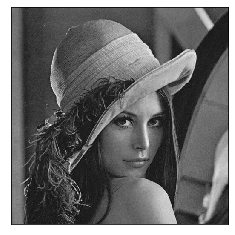

In [2]:
#Carrega a imagem e converte para escala de cinza
img = cv2.imread("exemplos/img1.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Exibe a dimensão da imagem (M, N)
print(img.shape)

#Exibe a imagem
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img, cmap=plt.cm.gray)
ax.set_xticks([])
ax.set_yticks([])
plt.show()


<h3>Exemplo 1. Segmentação.</h3>
<p>Para alterar determinado seguimento da imagem, por exemplo, deixar as linhas de 10 a 100 e colunas de 30 a 200, da cor (intensidade) 198, lembrando que o python indexa a matriz começando por 0, fazemos:</p>

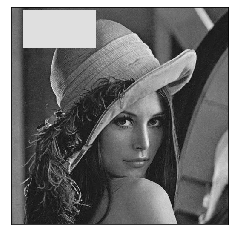

In [3]:
nova_img                = img[:]                                       #faz uma cópia da imagem original
nova_img[9:99 , 29:199] = np.ones(nova_img[9:99 , 29:199].shape) * 198 #cria um vetor para substituir o segmento

#Exibe a imagem alterada
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(nova_img, cmap=plt.cm.gray)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

<h2>O que são as bordas nas imagens?</h2>
<p>As bordas representam as mudanças abruptas nas imagens, ou seja, são as informações de mais alta frequência.
<br>Na Figura (a) onde ocorrem as mudanças abruptas, ou seja, onde o pixel muda de 255 (branco) para 0 (preto), teremos bordas bem delineadas.<br>
    Na Figura (b), na parte direita, não teremos uma borda, pois a mudança é suave, ou seja, os pixels mudam gradualmente de 255 para 0.
</p>
<br>
<div>
<div style="text-align:center;float:left;">
    <p style="color:#333;text-align:center">(a)</p> 
    <img src="exemplos/com_borda.png" width="300"><br>
</div>
<div style="text-align:center;">
    <p style="color:#333;text-align:center;">(b)</p> 
    <img src="exemplos/sem_borda.png" width="300"><br>
</div>
<div style="clear:both;"></div>
</div>

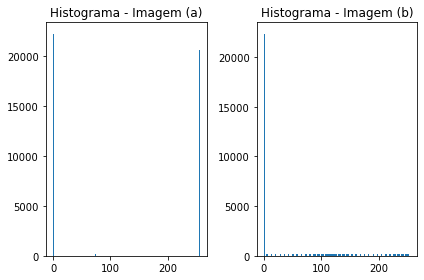

In [4]:
#Carrega a imagem com borda
img_com_borda = cv2.imread("exemplos/com_borda.png")
img_com_borda = cv2.cvtColor(img_com_borda, cv2.COLOR_RGB2GRAY)

#Carrega a imagem sem borda
img_sem_borda = cv2.imread("exemplos/sem_borda.png")
img_sem_borda = cv2.cvtColor(img_sem_borda, cv2.COLOR_RGB2GRAY)

#Calcula e exibe os histogramas de ambas imgens
fig = plt.figure()
ax1  = fig.add_subplot(121)
ax1.hist(img_com_borda.ravel(), 256, [0,256])
ax1.set_title('Histograma - Imagem (a)')
ax2  = fig.add_subplot(122)
ax2.hist(img_sem_borda.ravel(), 256, [0, 255])
ax2.set_title('Histograma - Imagem (b)')
plt.tight_layout()
plt.show()

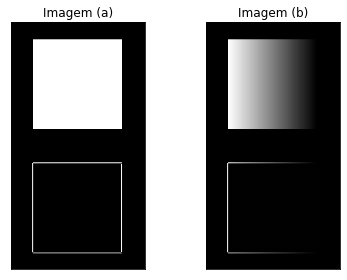

In [5]:
#Detecta as bordas nas imagens utilizando filtro Laplaciano
#Onde a imagem é convertida para ponto flutuante 64 bits
#e depois novamente para inteiro de 8 bits
bordas_img_com_borda = cv2.Laplacian(img_com_borda, cv2.CV_64F)
bordas_img_sem_borda = cv2.Laplacian(img_sem_borda, cv2.CV_64F)
bordas_img_com_borda = np.uint8(np.absolute(bordas_img_com_borda))
bordas_img_sem_borda = np.uint8(np.absolute(bordas_img_sem_borda))

#Concatena as imagens para melhor comparação na exibição
imgs_com_borda = np.vstack([img_com_borda, bordas_img_com_borda]) 
imgs_sem_borda = np.vstack([img_sem_borda, bordas_img_sem_borda]) 

#Exibe as figuras
fig = plt.figure()
ax1  = fig.add_subplot(121)
ax1.imshow(imgs_com_borda, cmap=plt.cm.gray)
ax1.set_title('Imagem (a)')
ax1.set_xticks([])
ax1.set_yticks([])

ax2  = fig.add_subplot(122)
ax2.imshow(imgs_sem_borda, cmap=plt.cm.gray)
ax2.set_title('Imagem (b)')
ax2.set_xticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.show()

<div style="border:1px solid #e5e5e5;clear:both;"></div>
<h2>Transformada Wavelet Discreta (Discrete Wavelet Transform - DWT)</h2>
<p>
    É uma transformação linear. É análoga a uma filtragem em dois canais, um passa-alta e ou passa-baixa. Ao aplicar o filtro wavelet, que é diferente para cada função base escolhida, faz-se a convolução dos das amostras do sinal os coeficientes desse filtro.
</p>
<br>
<div style="text-align:center">
    <p style="color:#333;text-align:center">Exemplo da Transformada Wavelet. </p> 
    <img src="exemplos/apresentacao/banco_filtros.png"><br>
</div>
<b>cA:</b> são os coeficientes de aproximação.<br>
<b>cD:</b> são os coeficientes de detalhes.<br>
Os expoentes em cA e cD indicam o nível de decomposição.<br>
<div style="border:1px solid #e5e5e5;clear:both;"></div>
<h3>Onde a Transformada Wavelet é utilizada?</h3>
<ul>
    <li>Análises de sinais na engenharia biomédica</li>
    <li>Sonar e radar</li>
    <li>Visão computacional</li>
    <li>Espectrometria</li>
    <li><b>Remoção de ruído</b></li>
    <li>Óptica e eletromagnetismo</li>
    <li>FBI e JPEG 2000, <b>sistemas de compressão</b></li>
    <li>Mercado financeiro</li>
    <li>Metalurgia</li>
</ul>
<div style="border:1px solid #e5e5e5;clear:both;"></div>
<h3>Exemplo 2: Decomposição (análise) de um sinal de eletrocardiograma (ECG).</h3><br>

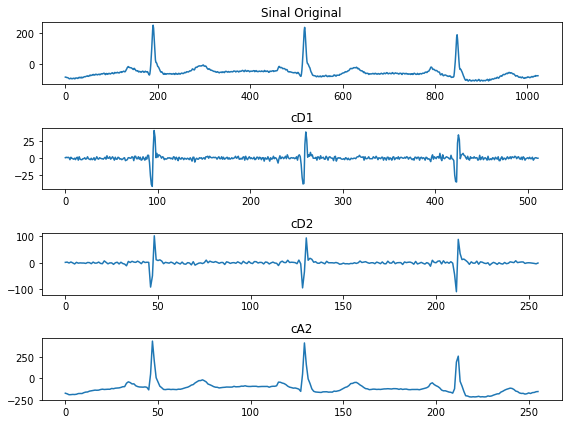

In [6]:
#Importa a biblioteca para aplicar a Transformada Wavelet Discreta (Discrete Wavelet Transform - DWT)
import pywt

#Cria um sinal do tipo eletrocardiograma (ECG)
ecg = pywt.data.ecg()

#Escolhe o filtro de Haar para implementar a DWT
filtro_wavelet = 'haar'

#Aplica a DWT em dois níveis de resolução utilizando o filtro de Haar
(cA1, cD1) = pywt.dwt(ecg, filtro_wavelet)
(cA2, cD2) = pywt.dwt(cA1, filtro_wavelet)

#Exibe o sinal original e os coeficientes wavelets
fig = plt.figure(figsize=(8, 6))
ax  = fig.add_subplot(411)
ax.plot(ecg)
ax.set_title('Sinal Original')

ax  = fig.add_subplot(412)
ax.plot(cD1)
ax.set_title('cD1')

ax  = fig.add_subplot(413)
ax.plot(cD2)
ax.set_title('cD2')

ax  = fig.add_subplot(414)
ax.plot(cA2)
ax.set_title('cA2')

plt.tight_layout()
plt.show()

<div style="border:1px solid #e5e5e5;clear:both;"></div>
<h3>Bases de Funções Wavelets. Filtros.</h3>
<p>
    Existem diversas bases wavelets para escolha. Algumas são utilizadas na DWT e outras na Continuos Wavelet Transform (CWT). Consulte na documentação cada família de funções: https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html#wavelet-families.
</p>
<p>
    Uma das bases mais utilizadas é a de Daubechies. Na biblioteca PyWavelets elas são referenciadas pela expressão 'dbN' onde N é o número de momentos nulos (quanto mais momentos nulos mais suave é a função).
</p>

In [7]:
#Mostras as famílias de funções wavelets disponíveis
print('Família de funções')
print(pywt.families())

#Mostra todas as bases de Daubechies
print('Bases Daubechies')
print(pywt.wavelist('db'))

Família de funções
['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
Bases Daubechies
['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']


In [8]:
#Mostra os coeficientes de filtro da db2
wavelet = pywt.Wavelet('db2')
print('Coeficientes filtro db2 de análise')
print('\t passa-baixa: ', wavelet.dec_lo)
print('\t passa-alta: ', wavelet.dec_hi)
print('Coeficientes filtro db4 de síntese')
print('\t passa-baixa: ', wavelet.rec_lo)
print('\t passa-alta: ', wavelet.rec_hi)

Coeficientes filtro db2 de análise
	 passa-baixa:  [-0.12940952255126037, 0.2241438680420134, 0.8365163037378079, 0.48296291314453416]
	 passa-alta:  [-0.48296291314453416, 0.8365163037378079, -0.2241438680420134, -0.12940952255126037]
Coeficientes filtro db4 de síntese
	 passa-baixa:  [0.48296291314453416, 0.8365163037378079, 0.2241438680420134, -0.12940952255126037]
	 passa-alta:  [-0.12940952255126037, -0.2241438680420134, 0.8365163037378079, -0.48296291314453416]


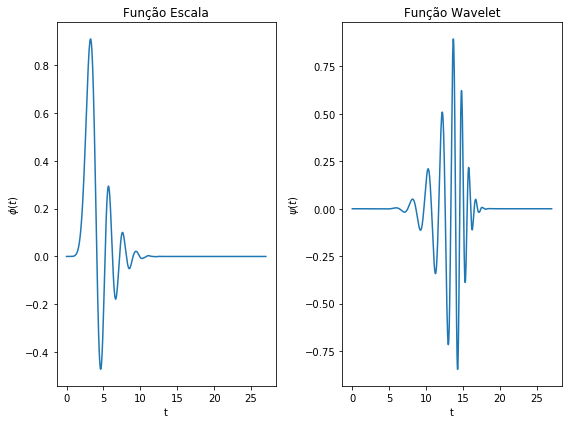

In [9]:
#Exibe as formas de onda das funções da aproximação (phi) e wavelet (psi)
wavelet = pywt.Wavelet('db14')
(phi, psi, t) = wavelet.wavefun(5)

fig = plt.figure(figsize=(8, 6))
ax  = fig.add_subplot(121)
ax.plot(t, phi)
ax.set_title('Função Escala')
ax.set_xlabel('t')
ax.set_ylabel('$\phi(t)$')

ax  = fig.add_subplot(122)
ax.plot(t, psi)
ax.set_title('Função Wavelet')
ax.set_xlabel('t')
ax.set_ylabel('$\psi(t)$')

plt.tight_layout()
plt.show()

<div style="border:1px solid #e5e5e5;clear:both;"></div>
<h3>Exemplo 3: Recomposição (síntese) de um sinal de eletrocardiograma (ECG).</h3><br>

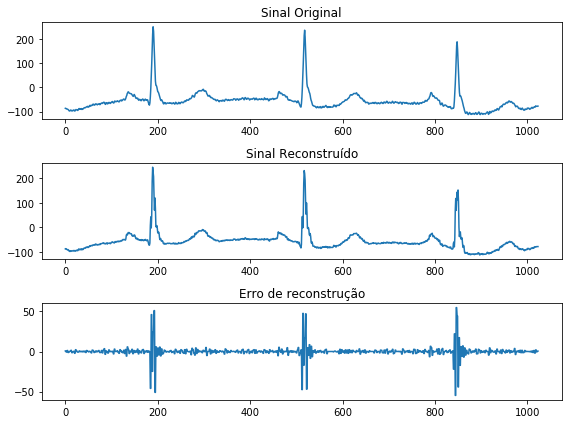

In [10]:
#Reconstrói (sintetiza) o sinal sem os coeficientes de detalhes do nível 2

#Anula os coeficientes de detalhes
cD2 *= 0

#Sintetiza o sinal no nível 1
cA1 = pywt.idwt(cA2, cD2, filtro_wavelet)

#Sintetiza o sinal no nível 0.
cA0 = pywt.idwt(cA1, cD1, filtro_wavelet)

#Exibe o sinal original e o sinal reconstruído
fig = plt.figure(figsize=(8, 6))
ax  = fig.add_subplot(311)
ax.plot(ecg)
ax.set_title('Sinal Original')

ax  = fig.add_subplot(312)
ax.plot(cA0)
ax.set_title('Sinal Reconstruído')

ax  = fig.add_subplot(313)
ax.plot(ecg - cA0)
ax.set_title('Erro de reconstrução')

plt.tight_layout()
plt.show()

<div style="border:1px solid #e5e5e5;clear:both;"></div>
<h3>Aplicação da DWT em processamento de imagens</h3>
<p>
    Vimos até agora que as bordas da imagem representam as mudanças abruptas, e que a DWT fornece sinais em dois canais: um sendo uma versão aproximada do sinal original e outro com os detalhes, ou seja, as mudanças abruptas desse sinal.
</p>
<p>
    Assim, esperamos que os coeficientes de detalhes representem as bordas de uma imagem. Entretanto temos um problema, pois a DWT é aplicada em sinais 1D (uma dimensão).
</p>
<p>
    Para driblar esse problema, a DWT é aplicada em <b>cada linha da matriz (imagem)</b> e depois os sinais resultantes são concatenados, produzindo duas imagens: cA e cD.<br>
    Sobre as imagens cA e cD, a DWT é aplicada novamente, mas agora <b>nas colunas da matrizes (imagens)</b>, produzindo quatro outras imagens A, V, D e H, tais que:
    <ul>
        <li>A: versão aproximada da imagem original</li>
        <li>V: detalhes verticias da imagem</li>
        <li>D: detalhes diagonais da imagem</li>
        <li>H: detalhes horizontais da imagem</li>
    </ul>
</p>
<div style="text-align:center">
    <p style="color:#333;text-align:center">Exemplo da Transformada Wavelet 2D. </p> 
    <img src="exemplos/apresentacao/dwt2.png"><br>
</div>
<p>
    <strong>IMPORTANTE:</strong> A DWT aplica um filtro proveniente da funcao base escolhida, a qual altera os valores da imagem, logo, os coeficientes acima não estarão no intervalo [0, 255]. Por isso, a função de quantização a seguir é necessária.
</p>
<br>

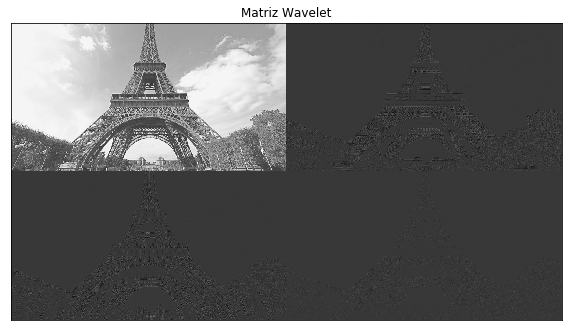

In [11]:
def quantizacao(imagem):
    '''
    Recebe uma imagem com valores float e devolve uma imagem no formato uint8
    com valores no intervalo [0, 255]
    '''

    #Uma versão dessa função pode ser encontrada no livro
    #Processamento Digital de Sinais utilizando Matlab e Wavelets
    #do autor Michael Weeks, Editora LTC, segunda edição
    mi     = np.min(imagem)
    ma     = np.max(imagem)
    escala = (ma - mi) + 1e-10 #1e-10 para evitar divisão por zero em certos casos
    
    return np.uint8(np.floor((imagem - mi) * 255 / escala))

def matriz(coeficientes):
    '''
    Recebe os coeficientes wavelets e concatena-os em uma única imagem para uma exibição
    geral dos efeitos da transformada
    '''
    #níveis de decomposição
    J = len(coeficientes) - 1

    #Coeficientes de aproximação
    matriz_wavelet = coeficientes[0]
    
    #Itera dos níveis mais baixos de resolução para os mais altos onde somente haverão os detalhes
    for j in np.arange(1, J + 1):

        #obtém os detalhes Horizontais, Verticais e Diagonais
        H, V, D  = coeficientes[j]
        
        '''
        Altera a dimensão da matriz com os coeficientes de aproximação, pois em certos casos
        ela possui um tamanho maior que as matrizes de detalhes
        '''
        dc = matriz_wavelet.shape[1] - H.shape[1] #diferença de colunas
    
        if not dc == 0: #Exclui dc colunas
            matriz_wavelet = matriz_wavelet[:,:-dc]

        dl = matriz_wavelet.shape[0] - H.shape[0] #diferença de linhas
        
        if not dl == 0: #Exclui dl linhas
            matriz_wavelet = matriz_wavelet[:-dl,:]

        '''
        Concatena as matrizes
        '''
        matriz_wavelet = np.hstack((matriz_wavelet, H))
        VD = np.hstack((V, D))
        matriz_wavelet = np.vstack((matriz_wavelet, VD))

    return quantizacao(matriz_wavelet)

#Carrega a imagem e converte para escala de cinza
img_original = cv2.imread("exemplos/img3.png")
img_original = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)

#Converte para float32 e para uma matriz com valores no intervalo [0, 1]
img_original = np.float32(img_original)
img_original /= 255.0

'''
Transformada wavelet
'''
#Escolha o filtro wavelet e os níveis de decomposição
base_wavelet = "db2"
niveis_dec   = 1

#Verifica o número máximo de níveis de decomposição
niveis_dec_max = pywt.dwtn_max_level(img_original.shape, base_wavelet)
if niveis_dec > niveis_dec_max:
   niveis_dec = niveis_dec_max

#Implementa a DWT 2D
coeficientes = pywt.wavedec2(img_original, base_wavelet, level=niveis_dec) #coeficientes wavelets

'''
Exibe a super matriz
'''
matriz_wavelet = matriz(coeficientes)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.imshow(matriz_wavelet, interpolation="nearest", cmap=plt.cm.gray)
ax.set_title('Matriz Wavelet')
ax.set_xticks([])
ax.set_yticks([])

fig.tight_layout()
plt.show()

<h3>Problema!</h3>
<p>
    Podemos ver na matriz wavelet acima que, embora tenha detectado as bordas, cada imagem tem apenas metade do tamanho da imagem original, e não é isso que queremos. Logo, precisamos reconstruir a imagem ao seu estado original. Mas se fizermos isso sem modificar os coeficientes teremos exatamente a mesma imagem.
</p>
<p>
    Para reconstruir uma imagem apenas com as bordas detectadas basta remover a imagem de aproximação, ou seja, basta multiplicar ela por zero e reconstruir a imagem sem essa informação.
</p>

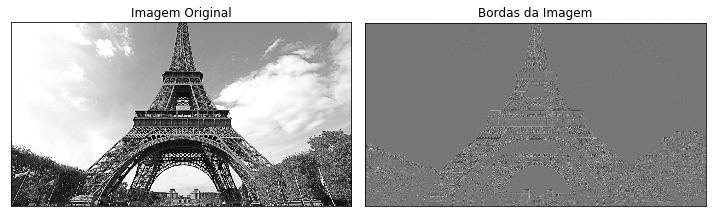

In [12]:
#Zera os coeficientes de aproximação
coeficientes[0] *= 0

#Reconstrói a imagem
img_reconstruida = pywt.waverec2(coeficientes, base_wavelet)

#Quantiza a imagem (bordas) para o intervalo [0, 255]
img_reconstruida = quantizacao(img_reconstruida)

#Exibe as imagens original e reconstruída
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(121)
ax1.imshow(img_original, cmap=plt.cm.gray)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Imagem Original')

ax2 = fig.add_subplot(122)
ax2.imshow(img_reconstruida, cmap=plt.cm.gray)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Bordas da Imagem')

fig.tight_layout()
plt.show()

<div style="border:1px solid #e5e5e5;clear:both;"></div>
<h3>A aplicação da DWT não para por aqui!</h3>
<p>
Existe um resultado importante na teoria da Transformação Wavelet que, a grosso modo, pode ser assim expresso: "os coeficientes de detalhes abaixo de um certo liminar representam a informação ruidosa do sinal original".
</p>
<p>
    Para remover esse ruído, emprega-se um método de encolhimento (wavelet shrinkage) dos coeficientes de detalhes utilizando o limiar universal, dado por $\lambda = \sigma\sqrt{2 \log_{10}(N)}$ onde $N$ é o comprimento do sinal e 
    $$\sigma = \dfrac{Mediana(|d|)}{0.6745}$$ é a variância média do ruído.
</p>
<p>
    Há dois métodos de encolhimento principais: 
    <ul>
        <li><b>hard</b> (Figura (a)) $$ d_{H} = \left\lbrace \begin{array}{rl} 0, & \textrm{ se } |d| \leq \lambda \\ d, & \textrm{ caso contrário } \end{array}\right.$$</li>
        <li><b>soft</b> (Figura (b)) $$ d_{S} = \left\lbrace \begin{array}{rl} 0, & \textrm{ se } |d| \leq \lambda \\ sign(d)(|d| - \lambda), & \textrm{ se } |d| > \lambda \end{array}\right.$$</li>
    </ul>
    onde $d$ é um coeficiente de detalhe em algum nível de decomposição e $sign(d)$ é o sinal desse escalar.
</p>
<br>

<div style="border:1px solid #e5e5e5;clear:both;"></div>
<h3>Aplicando o encolhimento Wavelet em uma imagem ruidosa</h3>

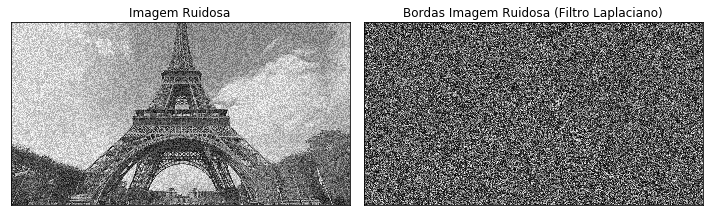

In [13]:
#Adiciona ruído a imagem original e quantiza
img_ruidosa = img_original + np.random.rand(img_original.shape[0], img_original.shape[1]) * 0.5
img_ruidosa = quantizacao(img_ruidosa)

#Detecta as bordas da imagem utilizando filtro Laplaciano
bordas_img_ruidosa = cv2.Laplacian(img_ruidosa, cv2.CV_64F)
bordas_img_ruidosa = np.uint8(np.absolute(bordas_img_ruidosa))

#Exibe a imagem com ruído
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(121)
ax1.imshow(img_ruidosa, cmap=plt.cm.gray)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Imagem Ruidosa')

ax2 = fig.add_subplot(122)
ax2.imshow(bordas_img_ruidosa , cmap=plt.cm.gray)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Bordas Imagem Ruidosa (Filtro Laplaciano)')

fig.tight_layout()
plt.show()

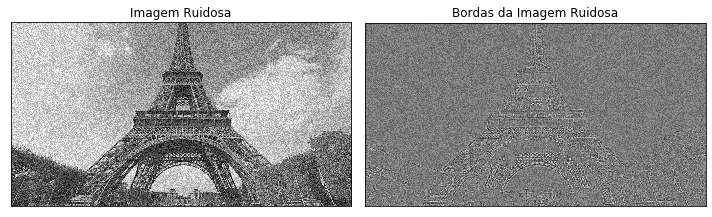

In [17]:
'''
Transformada wavelet
'''
#Escolha o filtro wavelet e os níveis de decomposição
base_wavelet = "db2"
niveis_dec   = 3

#Verifica o número máximo de níveis de decomposição
niveis_dec_max = pywt.dwtn_max_level(img_ruidosa.shape, base_wavelet)
if niveis_dec > niveis_dec_max:
   niveis_dec = niveis_dec_max

#Implementa a DWT 2D
coeficientes = pywt.wavedec2(img_ruidosa, base_wavelet, level=niveis_dec) #coeficientes wavelets

#Zera os coeficientes de aproximação
coeficientes[0] *= 0

#Encolhe os coeficientes de detalhes
for j in range(1, niveis_dec):

    #obtém os detalhes Horizontais, Verticais e Diagonais
    H, V, D  = coeficientes[j]

    #Para armazenar os detalhes modificados
    detalhes_enc = []
    
    for detalhe in [H, V, D]:
        
        #calcula o limiar
        sigma  = np.median(np.abs(detalhe))/0.6745
        limiar = sigma * np.sqrt(2 * np.log10(len(detalhe)))

        #encolhe os coeficientes
        detalhes_enc.append(pywt.threshold(detalhe, limiar, mode='hard')) 

    #reatribui os detalhes Horizontais, Verticais e Diagonais modificados (encolhidos) ao conjunto de coeficientes
    coeficientes[j] = detalhes_enc[0], detalhes_enc[1], detalhes_enc[2]

#Reconstrói a imagem
img_reconstruida = pywt.waverec2(coeficientes, base_wavelet)

#Quantiza a imagem (bordas) para o intervalo [0, 255]
img_reconstruida = quantizacao(img_reconstruida)

#Exibe as imagens original e reconstruída
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(121)
ax1.imshow(img_ruidosa, cmap=plt.cm.gray)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Imagem Ruidosa')

ax2 = fig.add_subplot(122)
ax2.imshow(img_reconstruida, cmap=plt.cm.gray)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Bordas da Imagem Ruidosa')

fig.tight_layout()
plt.show()

<h3>Que diferença eu tenho ao escolher diferentes bases de níveis de decomposição?</h3>
<p><b>1º observação: </b> quanto maior o nível de resolução, menos informação será removida dos coeficientes de aproximação, logo a imagem reconstruída terá maior influência das informações não relativas às bordas.</p>
<div style="text-align:center">
        <p style="color:#333;text-align:center">Exemplo. Nível 9 de resolução.</p> 
        <img src="exemplos/apresentacao/level9.png"><br>
</div>
<div style="text-align:center">
        <p style="color:#333;text-align:center">Exemplo de reconstrução. Nível 9 de resolução.</p> 
        <img src="exemplos/apresentacao/db1-l9.png"><br>
</div>
<p><b>2º observação: </b> quanto maior a quantidade de momentos nulos, mais suave será a imagem reconstruída, logo as bordas poderão não estar muito nítidas.</p>
<br>
<div style="text-align:center">
        <p style="color:#333;text-align:center">Exemplo de reconstrução. Nível 3 de resolução e DB com 32 momentos nulos.</p> 
        <img src="exemplos/apresentacao/db32-l3.png"><br>
</div>
<div style="text-align:center">
        <p style="color:#333;text-align:center">Exemplo de reconstrução. Nível 1 de resolução e DB com 1 momento nulo.</p> 
        <img src="exemplos/apresentacao/db1-l1.png"><br>
</div>
<br>
<p><b>3º observação: </b> o custo computacional aumento conforme aumenta os níveis de resolução e a quantidade de momentos nulos. No primeiro caso, pois será necessária a execução da DWT mais vezes, e no segundo, porque, os filtros são maiores quanto mais momentos nulos tem a base.</p>

<hr>
<h3>Vamos à implementação geral do projeto!</h3>
<p>Explicação de todo o código fonte envolvido no sistema de detecção de bordas utilizando DWT</p>
<hr>
<h3>deteccao.py</h3>

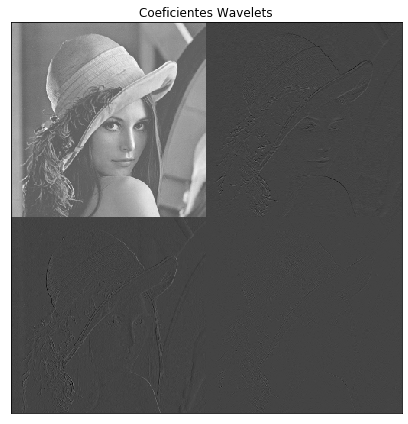

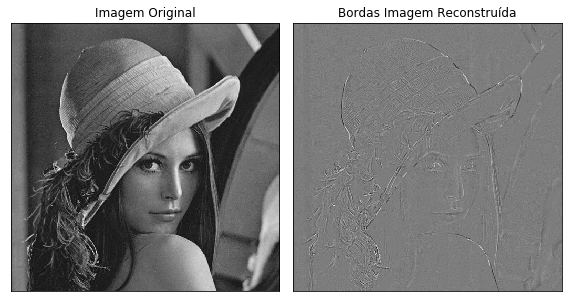

In [15]:
# -*- coding: utf-8 -*-
'''
Implementa a detecção de bordas em imagens utilizado a transformada wavelet estacionária
'''

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
import dwtimg

#Carrega a imagem e converte para escala de cinza
img_original = cv2.imread("exemplos/img1.png")
img_original = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)
#Converte para float32 e para uma matriz com valores no intervalo [0, 1]
img_original = np.float32(img_original)
img_original /= 255.0

'''
Transformada wavelet
'''
#Escolha o filtro wavelet
base_wavelet = "db1"
niveis_dec   = 1

#Verifica o número máximo de níveis de decomposição
niveis_dec_max = pywt.dwtn_max_level(img_original.shape, base_wavelet)
if niveis_dec > niveis_dec_max:
   niveis_dec =  niveis_dec_max
   print('Nível de resolução alterado para ', niveis_dec)

#Implementa a DWT bidimensional
coeficientes = pywt.wavedec2(img_original, base_wavelet, level=niveis_dec) #coeficientes wavelets

'''
Exibe a super matriz
'''
matriz_wavelet = dwtimg.matriz(coeficientes)
fig = plt.figure(figsize=(8, 6))
ax0 = fig.add_subplot(111)
ax0.imshow(matriz_wavelet, interpolation="nearest", cmap=plt.cm.gray)
ax0.set_title('Coeficientes Wavelets')
ax0.set_xticks([])
ax0.set_yticks([])

fig.tight_layout()

#Zera/encolhe os coeficientes
coeficientes = dwtimg.encolhe(coeficientes)

#Reconstroi a imagem
img_reconstruida = pywt.waverec2(coeficientes, base_wavelet)

#Quantiza a imagem (bordas) para o intervalo [0, 255]
img_reconstruida = dwtimg.quantizacao(img_reconstruida)
#img_reconstruida = dwtimg.binario(img_reconstruida, 0.6)

'''
Salva a imagem de bordas
'''
cv2.imwrite('exemplos/img_bordas.png', img_reconstruida)


'''
Exibe as imagens
'''
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img_original, interpolation="nearest", cmap=plt.cm.gray)
ax1.set_title('Imagem Original')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_reconstruida, interpolation="nearest", cmap=plt.cm.gray)
ax2.set_title('Bordas Imagem Reconstruída')
ax2.set_xticks([])
ax2.set_yticks([])

fig.tight_layout()

plt.show()


<h3>dwtimg.py</h3>

In [16]:
# -*- coding: utf-8 -*-
'''
Implementa alguma funções úteis para manipular imagens
ao utilizar a Tranformada Wavelet Discreta (Discrete Wavelet Transform - DWT)
'''
import numpy as np
import cv2
import pywt

def encolhe(coeficientes, metodo = 'soft'):
    '''
    Encolhe/zera os coeficientes de detalhes e de aproximação
    dados os coeficientes wavelets
    '''
    
    #Zera os coeficientes de aproximação
    coeficientes[0] *= 0
        
    #Aplica o encolhimento dos coeficientes
    for j in range(1, len(coeficientes) - 1):
        
        #obtém os detalhes Horizontais, Verticais e Diagonais
        H, V, D  = coeficientes[j]

        #Para armazenar os detalhes modificados
        detalhes_enc = []
        
        for detalhe in [H, V, D]:
            
            #calcula o limiar multiplicado pelo variância do ruído
            sigma  = np.median(np.abs(detalhe))/0.6745
            limiar = sigma * np.sqrt(2 * np.log10(len(detalhe)))

            #encolhe os coeficientes
            detalhes_enc.append(pywt.threshold(detalhe, limiar, mode = metodo)) 

        #reatribui os detalhes Horizontais, Verticais e Diagonais modificados (encolhidos) ao conjunto de coeficientes
        coeficientes[j] = detalhes_enc[0], detalhes_enc[1], detalhes_enc[2]

    return coeficientes


def quantizacao(imagem):
    '''
    Recebe uma imagem com valores float e devolve uma imagem no formato uint8
    com valores no intervalo [0, 255]
    '''

    #Uma versão dessa função pode ser encontrada no livro
    #Processamento Digital de Sinais utilizando Matlab e Wavelets
    #do autor Michael Weeks, Editora LTC, segunda edição
    mi     = np.min(imagem)
    ma     = np.max(imagem)
    escala = (ma - mi) + 1e-10 #1e-10 para evitar divisão por zero em certos casos
    
    return np.uint8(np.floor((imagem - mi) * 255 / escala))

def binario(imagem, percentual):
    '''
    Converte a imagem para preto e branco, para destacar as bordas
    1   = preto total
    0.5 = bordas em branco fundo em preto
    0   = branco total
    '''
    limiar = np.floor(percentual * 255)
    (ths, imagem) = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
    return imagem

        
def matriz(coeficientes, percentual = None):
    '''
    Recebe os coeficientes wavelets e concatena-os em uma única imagem para uma exibição
    geral dos efeitos da transformada
    '''
    #níveis de decomposição
    J = len(coeficientes) - 1

    #Coeficientes de aproximação
    cA = coeficientes[0]

    #Se for para deixar a imagem preta/branca
    if percentual is not None:
        cA = binario(quantizacao(cA), percentual)

    matriz_wavelet = cA
    
    #Itera dos níveis mais baixos de resolução para os mais altos onde somente haverão os detalhes
    for j in np.arange(1, J + 1):

        #obtém os detalhes Horizontais, Verticais e Diagonais
        H, V, D  = coeficientes[j]
        
        #Se for para deixar a imagem preta/branca
        if percentual is not None:
            V = binario(quantizacao(V), percentual)
            D = binario(quantizacao(D), percentual)
            H = binario(quantizacao(H), percentual)

        '''
        Altera a dimensão da matriz com os coeficientes de aproximação, pois em certos casos
        ela possui um tamanho maior que as matrizes de detalhes
        '''
        dc = matriz_wavelet.shape[1] - H.shape[1] #diferença de colunas
    
        if not dc == 0: #Exclui dc colunas
            matriz_wavelet = matriz_wavelet[:,:-dc]

        dl = matriz_wavelet.shape[0] - H.shape[0] #diferença de linhas
        
        if not dl == 0: #Exclui dl linhas
            matriz_wavelet = matriz_wavelet[:-dl,:]

        '''
        Concatena as matrizes
        '''
        matriz_wavelet = np.hstack((matriz_wavelet, H))
        VD = np.hstack((V, D))
        matriz_wavelet = np.vstack((matriz_wavelet, VD))

    if percentual is not None:
        return matriz_wavelet
    else:
        return quantizacao(matriz_wavelet)


<h3>É isso então!</h3>
<p>Fianlizamos esse projeto por aqui. Não se esqueçam de mesclar seus estudos entre teoria (matemática, lógica, estatística, algoritmos) e prática (programação).</p>